# MA0281 DSAI Group Project

For this project, we shall be exploring 2 problems as listed below:
1. Rating prediction

2. Price prediction

# Problem 1: Prediction of airbnb RATINGS using multiple variables

## Aim: Use multi-variate linear regression model to predict the ratings of particular airbnbs

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly
1
!echo $PATH

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools

# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

'C:\Users\tanus\Anaconda3\New' is not recognized as an internal or external command,
operable program or batch file.


$PATH


ModuleNotFoundError: No module named 'plotly'

In [91]:
# Import all 3 datasets (calendar, listings, reviews)
calendardata = pd.read_csv('calendar.csv')
calendardata.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [92]:
listingdata = pd.read_csv('listings.csv')
listingdata.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [93]:
reviewsdata = pd.read_csv('reviews.csv')
reviewsdata.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [94]:
reviewsdata.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [95]:
listingdata.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/5062445,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


# Cleaning the dataset

In [96]:
# Remove empty data points
calendardata.dropna(axis=0,subset=['price'],inplace=True)
reviewsdata.dropna(axis=0,subset=['comments'],inplace=True)
listingdata=listingdata.rename(columns={'id':'listing_id'})

In [97]:
calendardata.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [98]:
# We remove the dollar symbol as they cannot be used in data analysis
listingdata['monthly_price'] = pd.to_numeric(listingdata['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['price'] = pd.to_numeric(listingdata['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['weekly_price'] = pd.to_numeric(listingdata['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['security_deposit'] = pd.to_numeric(listingdata['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['cleaning_fee'] = pd.to_numeric(listingdata['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['extra_people'] = pd.to_numeric(listingdata['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
listingdata['host_response_rate'] = pd.to_numeric(listingdata['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
                                        ,errors='coerce')

In [99]:
# Convert the numeric dates given into actual dates (i.e. with actual months and years)
listingdata['host_since']=pd.to_datetime(listingdata['host_since'])
listingdata['month']=listingdata.host_since.dt.month
listingdata['year']=listingdata.host_since.dt.year

In [100]:
# Combine listingdata with calanderdata
calendardata=listingdata.merge(calendardata,on='listing_id')

In [101]:
calendardata['date']=pd.to_datetime(calendardata['date'])
calendardata['month']=calendardata.date.dt.month
calendardata['year']=calendardata.date.dt.year

In [102]:
calendardata.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,month,year,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-13,t,$85.00
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-14,t,$85.00
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-18,t,$85.00


In [103]:
calendardata.dropna(axis=0,subset=['price_y'],inplace=True)
calendardata['price_y'] = pd.to_numeric(calendardata['price_y'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
calendardata

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,month,year,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-04,t,85.0
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-05,t,85.0
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-13,t,85.0
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-14,t,85.0
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,1,2016,2016-01-18,t,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,flexible,f,f,1,NaN,1,2016,2016-01-06,t,87.0
934538,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,flexible,f,f,1,NaN,1,2016,2016-01-07,t,87.0
934539,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,flexible,f,f,1,NaN,1,2016,2016-01-10,t,87.0
934540,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,flexible,f,f,1,NaN,1,2016,2016-01-11,t,87.0


In [104]:
listingdata.host_response_rate.iloc[2]

67.0

In [105]:
# Check second row of data to see the headings (or variables)
listingdata.iloc[2]

listing_id                                                       3308979
listing_url                         https://www.airbnb.com/rooms/3308979
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                 New Modern House-Amazing water view
                                                    ...                 
require_guest_phone_verification                                       f
calculated_host_listings_count                                         2
reviews_per_month                                                   1.15
month                                                                  6
year                                                                2014
Name: 2, Length: 94, dtype: object

In [106]:
# Drop non-essential data that cannot be used in data analysis, leaving essential data we will use as variables in our prediction model(i.e. review_scores_rating etc.)
listingdata2=listingdata._get_numeric_data()
listingdata2.dropna(axis=0,subset=["review_scores_rating","review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"],inplace=True)
listingdata2

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,month,year
0,241032,20160104002432,956883,96.0,3.0,3.0,47.636289,-122.371025,4,1.0,...,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07,8.0,2011.0
1,953595,20160104002432,5177328,98.0,6.0,6.0,47.639123,-122.365666,4,1.0,...,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48,2.0,2013.0
2,3308979,20160104002432,16708587,67.0,2.0,2.0,47.629724,-122.369483,11,4.5,...,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15,6.0,2014.0
4,278830,20160104002432,1452570,100.0,2.0,2.0,47.632918,-122.372471,6,2.0,...,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89,11.0,2011.0
5,5956968,20160104002432,326758,NaN,1.0,1.0,47.630525,-122.366174,2,1.0,...,10.0,10.0,10.0,10.0,10.0,NaN,1,2.45,12.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,20160104002432,1379138,100.0,1.0,1.0,47.654205,-122.352604,5,1.0,...,8.0,10.0,10.0,10.0,8.0,NaN,1,1.56,11.0,2011.0
3811,8578490,20160104002432,11847918,100.0,1.0,1.0,47.657898,-122.346692,3,1.0,...,8.0,10.0,10.0,10.0,10.0,NaN,1,0.63,2.0,2014.0
3812,3383329,20160104002432,3443346,100.0,3.0,3.0,47.654516,-122.358124,4,1.0,...,10.0,10.0,10.0,9.0,10.0,NaN,3,4.01,9.0,2012.0
3813,8101950,20160104002432,31148752,99.0,354.0,354.0,47.664295,-122.359170,6,2.0,...,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30,4.0,2015.0


### We are done with cleaning up the dataset, now we move on to achieving our aim which is:

# Multi-variate prediction using linear regresssion model

Response: **review_scores_rating**

Predictors:
**review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value**

In [107]:
y = pd.DataFrame(listingdata2["review_scores_rating"])
X = pd.DataFrame(listingdata2[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]])

In [108]:
# Check total number of datapoints (3158 in this case)
X['review_scores_accuracy']

0       10.0
1       10.0
2       10.0
4        9.0
5       10.0
        ... 
3810     9.0
3811     9.0
3812    10.0
3813     8.0
3814    10.0
Name: review_scores_accuracy, Length: 3158, dtype: float64

# Splitting into train and test datasets

In [109]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes (total number of points, 2368+790=3158)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2368, 1) (2368, 6)
Test Set  : (790, 1) (790, 6)


# Basic exploration

Perform basic statistical exploration and visualization on the Train Set.

In [110]:
# Check the train dataset
y_train.head()

,review_scores_rating
1022,98.0
1059,95.0
1794,98.0
12,98.0
1379,95.0


In [111]:
# Summary Statistics for Response (review_scores_rating)
y_train.describe()

,review_scores_rating
count,2368.000000
mean,94.587416
std,6.502994
min,20.000000
25%,93.000000
50%,96.000000
75%,99.000000
max,100.000000


In [112]:
# Summary Statistics for Predictors (we have chosen 6 essential variables in this case)
X_train.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,9.642314,9.551098,9.789696,9.812500,9.614443,9.453547
std,0.689115,0.809172,0.573779,0.539426,0.629840,0.749282
min,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Check distribution of response variable using standard plots

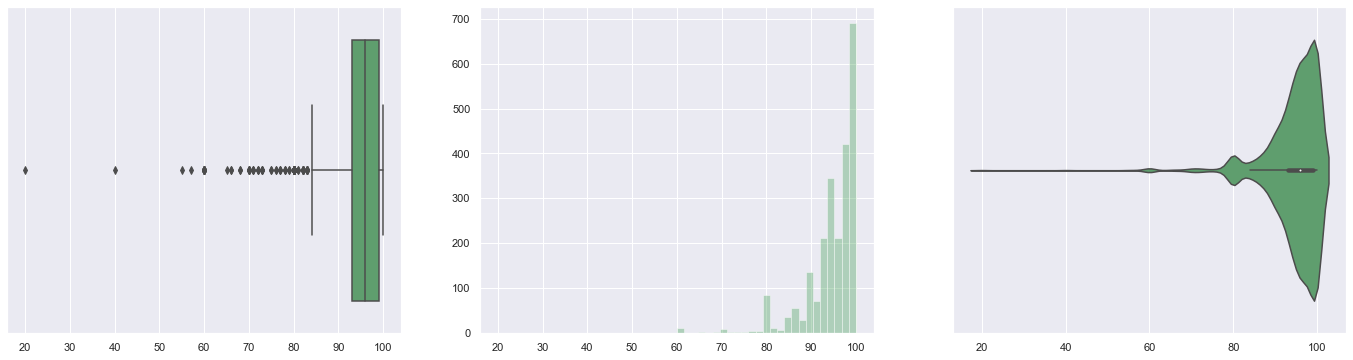

In [113]:
# Draw the distribution of Response (review_scores_rating)
y_train = y_train.dropna()
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")

#sb.distplot(y_train.dropna())
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

# Check distribution of predictor variables using standard plots

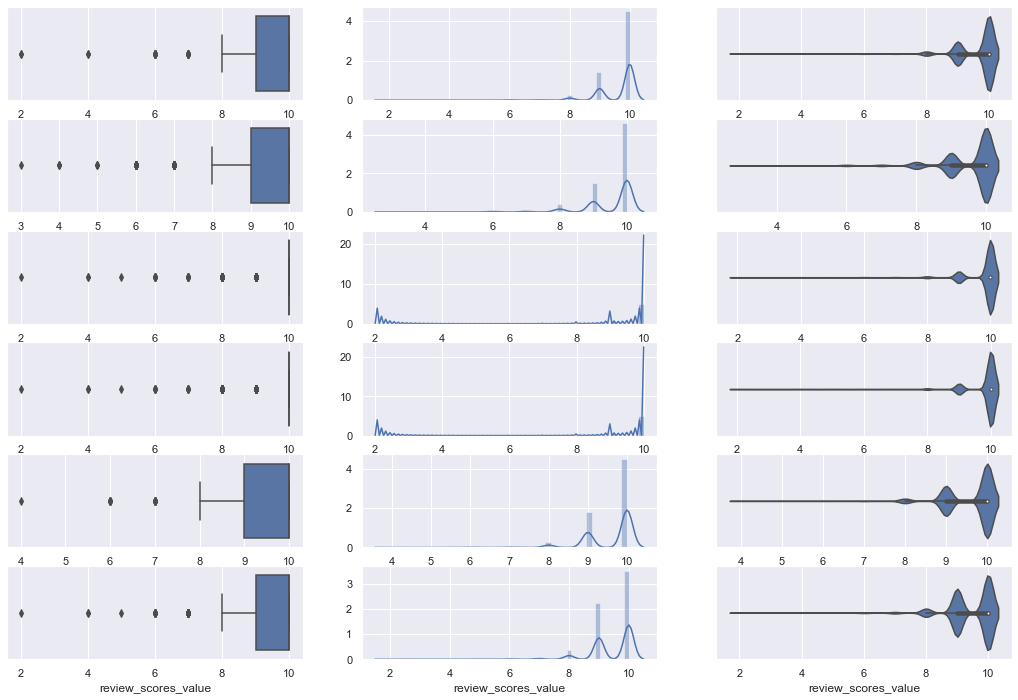

In [114]:
# Draw the distributions of all 6 Predictors
f, axes = plt.subplots(6, 3, figsize=(18, 12))

# We also drop empty datapoints
count = 0
for var in X_train:
    X_train=X_train.dropna()
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

# Interactive combined box plot for the 6 predictor variables
Hover the mouse over the points on the combined box plot to see their exact values

In [115]:
# Plot combined box plot to check the distribution of all 6 variables
trace0 = go.Box(x = X['review_scores_accuracy'], showlegend = False, name = "review_scores_accuracy")
trace1 = go.Box(x = X['review_scores_cleanliness'], showlegend = False, name = "review_scores_cleanliness")
trace2 = go.Box(x = X['review_scores_checkin'], showlegend = False, name = "review_scores_checkin")
trace3 = go.Box(x = X['review_scores_communication'], showlegend = False, name = "review_scores_communication")
trace4 = go.Box(x = X['review_scores_location'], showlegend = False, name = "review_scores_location")
trace5 = go.Box(x = X['review_scores_value'], showlegend = False, name = "review_scores_value")

data = [trace0, trace1, trace2, trace3, trace4, trace5]
py.iplot(data)

# Use histograms to check score distribution

In [116]:
X = pd.DataFrame(listingdata2[["review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]])

# Since all the variables are scores rated out of 10, we can use a histogram to check the distribution of scores
# Get Histogram from plotly.graph_objs (go)
count = 0
for var in X:
    trace = go.Histogram(x = X[var], histnorm = 'density')
    layout = go.Layout(title = var)
    data = [trace]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

# Interactive correlation heatmap
We can check the exact value of the correlation coefficient by hovering the mouse over each of the boxes

In [117]:
# Check correlation between the variables using heatmap
# We concat all the essential variable together under a new variable "a"
y = pd.DataFrame(listingdata2["review_scores_rating"])
X = pd.DataFrame(listingdata2[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]])
a = pd.concat([y, X], axis = 1, join_axes = [y.index])

# Heatmap of the Correlation Matrix using the single new variable "a"
trace = go.Heatmap(z = a.corr(), 
                   x = a.columns, 
                   y = a.columns, 
                   colorscale = 'Hot',
                   reversescale = True)
data=[trace]
py.iplot(data, filename='labelled-heatmap')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



# Analysis:
### As expected, the 'value' and 'cleanliness' of the airbnb has the strongest correlation with the review scores.
### In a sense, the patrons expect high value (for money) and high levels of cleanliness as the main deciding factors for giving a good review (or in this case a high review score)

# Plot linear regression model (Multi-variate prediction)

In [118]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-0.48059868]
Coefficients of Regression 	: a =  [[1.39612501 2.32740778 1.43050576 1.08058792 0.69041095 2.97575458]]



,Predictors,Coefficients
0,review_scores_accuracy,1.396125
1,review_scores_cleanliness,2.327408
2,review_scores_checkin,1.430506
3,review_scores_communication,1.080588
4,review_scores_location,0.690411
5,review_scores_value,2.975755


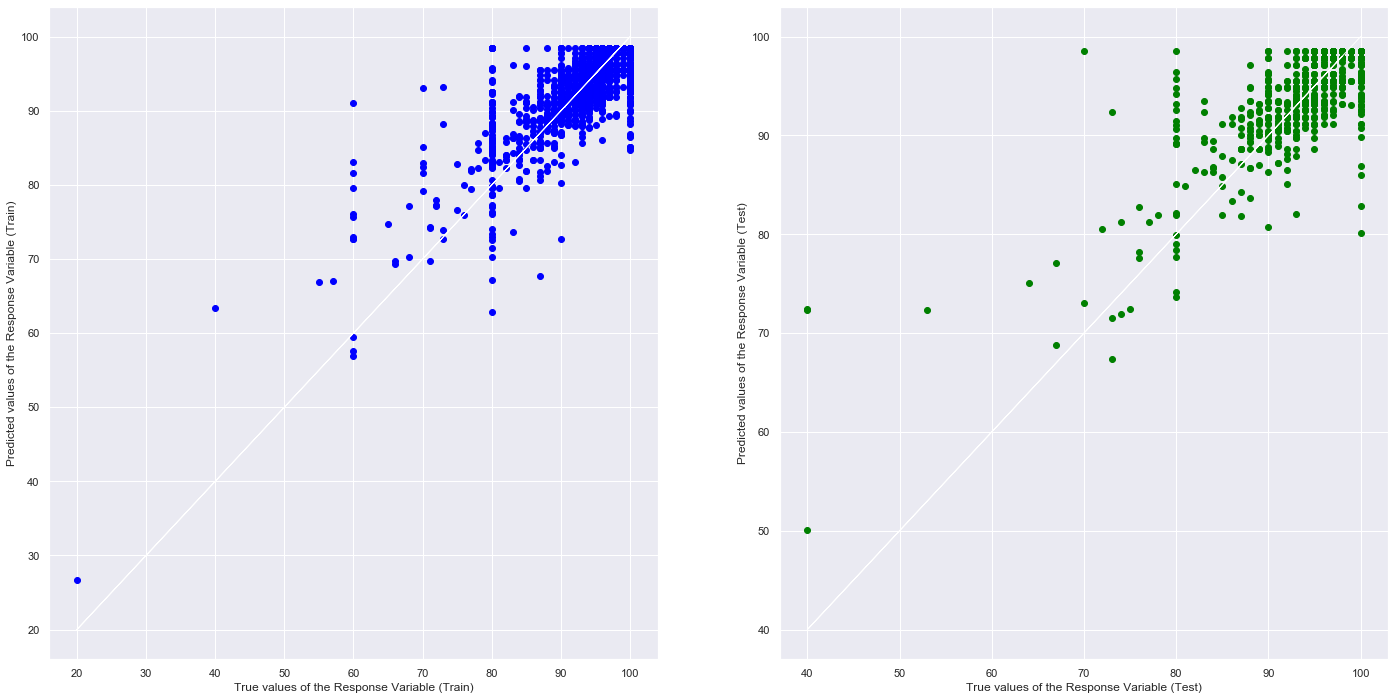

In [119]:
# Predict the Response variable values (i.e. review score ratings) from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
# The plot on the left with the blue datapoints is the train set
# The plot on the right with the green datapoints is the test set
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Check goodness of fit of model

In [120]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6671522685502226
Mean Squared Error (MSE) 	: 14.069831332982647

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6300816721978686
Mean Squared Error (MSE) 	: 17.464157213200984



With this model we are now able to predict the **rating scores** for any particular airbnb by inputting the 6 predictor variables.

# Problem 2: Prediction of airbnb PRICE using the multiple variables

## Aim: Use multi-variate linear regression model to predict the price of particular airbnbs

### We observe the price fluctuations of airbnb prices over the months across particular years
# Price of airbnb in the year 2015

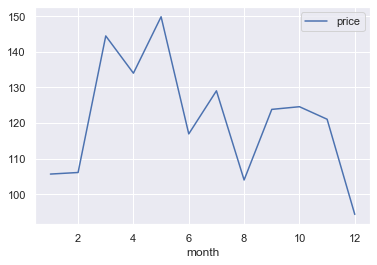

In [121]:
sb.lineplot(data=pd.pivot_table(data=listingdata[(listingdata['year'] == 2015)],index='month',values='price',aggfunc='mean'))

# Price of airbnb in the year 2016

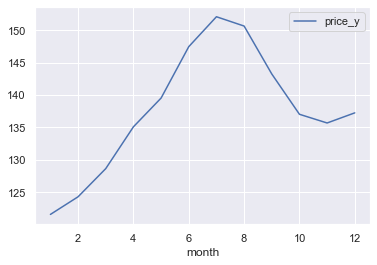

In [122]:
sb.lineplot(data=pd.pivot_table(data=calendardata[(calendardata['year']==2016)],index='month',values='price_y',aggfunc='mean'))

There does not seem to be a noticeable trend **across time periods**. Hence we look to other variables to observe trends.

## Variable Description:
listing_data: listing data frame we will use in this part of the problem.

listing_data_new: the clean data frame we are using in this problem.

In [1]:
#Import a fresh new dataset
listing_data = pd.read_csv('listings.csv')
listing_data.head()
print(listing_data.dtypes)

#Dropping Nan Values AND extracting the essential numeric variables
listing_data_new=listing_data.dropna(axis=0,subset=["price",'extra_people','guests_included','availability_30','availability_60','availability_90','availability_365','extra_people','minimum_nights','maximum_nights','host_listings_count','accommodates', 'bathrooms', 'bedrooms','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','calculated_host_listings_count','number_of_reviews','host_acceptance_rate','host_response_rate'])

NameError: name 'pd' is not defined

In [124]:
#find number of listings and number of hosts
listings_number = listing_data_new['id'].count()
hosts_number = len(listing_data_new['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number, 
                                                                                          hosts_number))

listings.csv dataset contains information on 2655 listings provided by 1816 hosts.


## Cleaning the dataset 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,https://www.airbnb.com/rooms/262764,20160104002432,2016-01-04,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,We love that Fremont is so centrally located t...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.56
3811,8578490,https://www.airbnb.com/rooms/8578490,20160104002432,2016-01-04,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,I am equidistant to Fremont and Wallingford an...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.63
3812,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,10.0,f,NaN,WASHINGTON,t,moderate,t,t,3,4.01
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30


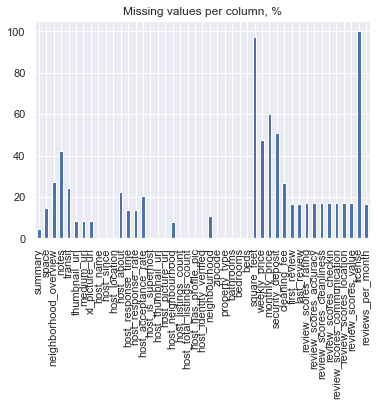

In [125]:
#find percentage of missing values for each column
listings_missing_df = listing_data.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')
listing_data
listing_data_new['host_acceptance_rate'].dtypes

#Cleaning the data set
listing_data_new['price'] = listing_data_new['price'].astype(str)
listing_data_new['price'] = listing_data_new['price'].str.replace("[$, ]", "").astype("float")
listing_data_new['host_response_rate'] = listing_data_new['host_response_rate'].astype(str)
listing_data_new['host_acceptance_rate'] = listing_data_new['host_response_rate'].astype(str)
listing_data_new['extra_people'] = listing_data_new['extra_people'].astype(str)
listing_data_new['host_acceptance_rate'] = listing_data_new['host_acceptance_rate'].str.replace("[%, ]", "").astype("float")
listing_data_new['host_response_rate'] = listing_data_new['host_response_rate'].str.replace("[%, ]", "").astype("float")
listing_data_new['extra_people'] = listing_data_new['extra_people'].str.replace("[$, ]", "").astype("float")
listing_data_new

## REMOVING OUTLIERS
After analysis, we noticed that most of the values lie from 0 to 500.The maximum value for Price is 999.Therefore to improve the accuracy of our linear regression model,we remove these outliers.(Refer to the box plots and statistical description of 'y' later)

​

In [ ]:
#REMOVE OUTLIERS
print(listing_data_new.count())
listing_data_new['price'] = listing_data_new['price'][listing_data_new['price'].between(0, 500)] # without outliers
listing_data_new_1=listing_data_new.dropna(axis=0,subset=['price','extra_people','guests_included','availability_30','availability_60','availability_90','availability_365','extra_people','minimum_nights','maximum_nights','host_listings_count','accommodates', 'bathrooms', 'bedrooms','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','calculated_host_listings_count','number_of_reviews','host_acceptance_rate','host_response_rate'])
print(listing_data_new_1.count())
listing_data_new_1['price']

# LINEAR REGRESSION MODEL (for price)

Generally prices of airbnb hotels are decided by **the number of guests staying and the facilities / accommodities available**. Hence we have chosen:

Response: **price**

Predictors:
**accommodates, bathrooms, bedrooms**

In [126]:
# Extract Response and Predictors
y = pd.DataFrame(listing_data_new["price"])
X = pd.DataFrame(listing_data_new[['accommodates', 'bathrooms', 'bedrooms']])

In [127]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Data exploration

In [128]:
# Summary Statistics for Response (i.e. price)
y_train.describe()

,price
count,1991.000000
mean,119.818182
std,78.444066
min,25.000000
25%,70.500000
50%,99.000000
75%,148.500000
max,999.000000


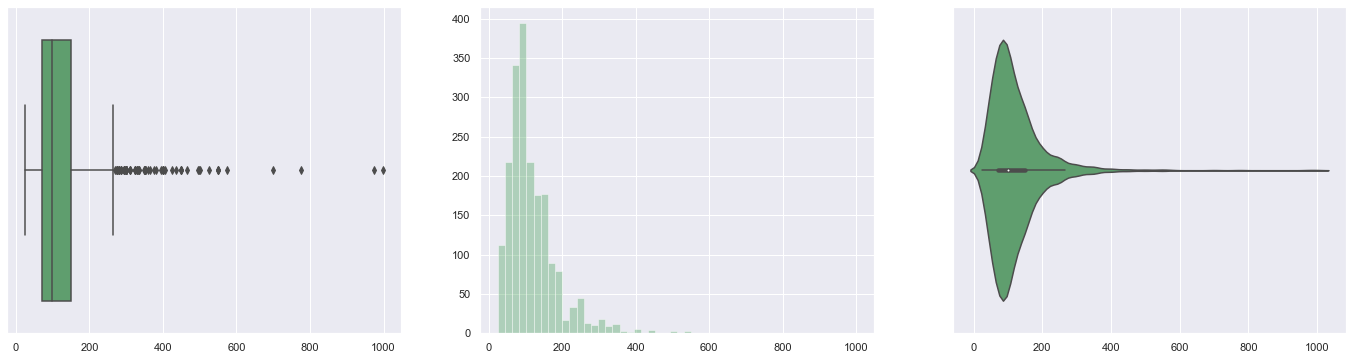

In [129]:
# Draw the distribution of Response
y_train = y_train.dropna()
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
#sb.distplot(y_train.dropna())
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

# Interactive correlation heatmap
Hover the mouse over the boxes to observe the correlation coefficient between both variables

In [ ]:
# Correlation between Response and the Predictors
# We concat the essential variables together 
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

# Heatmap of the Correlation Matrix using the single new variable "trainDF"
trace = go.Heatmap(z = trainDF.corr(), 
                   x = trainDF.columns, 
                   y = trainDF.columns, 
                   colorscale = 'Hot',
                   reversescale = True)
data=[trace]
py.iplot(data, filename='labelled-heatmap')

## REMOVING OUTLIERS
After analysis, we noticed that most of the values lie from 0 to 500.The maximum value for Price is 999.Therefore to improve the accuracy of our linear regression model,we remove these outliers.(Refer to the box plots and statistical description of 'y' later)


### Analysis
The number of accomodates and the number of bedrooms available seem to play the biggest part in determining the price of the airbnb given their rather high correlation to the price. The presence of bathrooms does not seem to affect the price much.

# Plot linear regression model

Intercept of Regression 	: b =  [14.26406651]
Coefficients of Regression 	: a =  [[17.16892788 17.4807152  20.30703295]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47699284464594527
Mean Squared Error (MSE) 	: 3216.6931689211424

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.572838936934926
Mean Squared Error (MSE) 	: 3498.55701288124



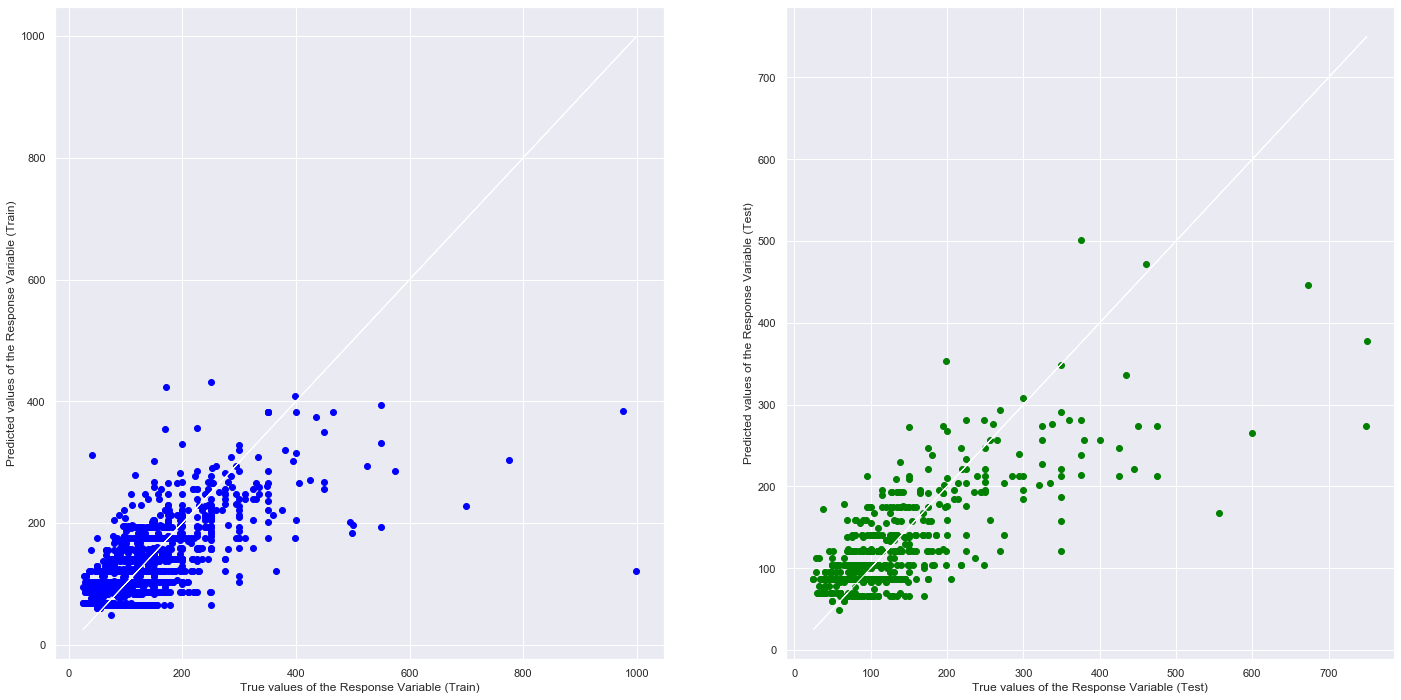

In [131]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict price values corresponding to the 3 predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

With this model we are now able to predict the **price** for any particular airbnb by inputting the 3 predictor variables.